In [1]:
%load_ext autoreload
import torch
import matplotlib.pyplot as plt

from utils import metrics
from utils import SaveModel

c:\Users\hanse\Documents\ml_code\dl-replications\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
torch.cuda.is_available()

False

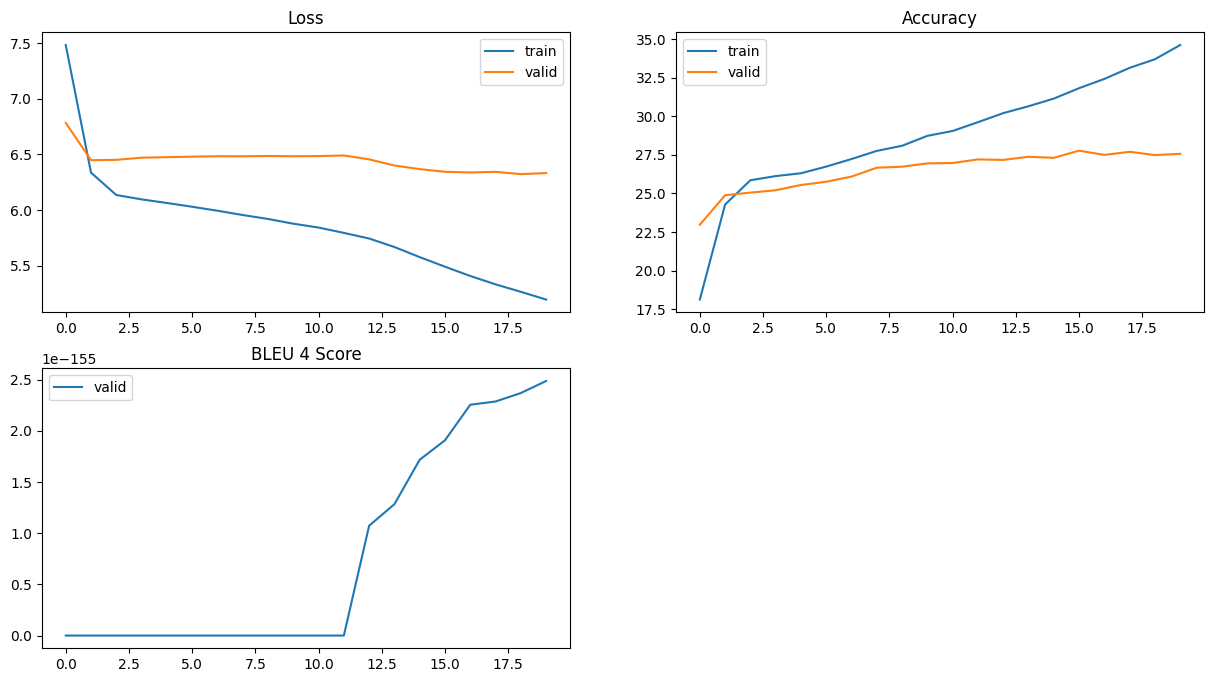

In [4]:
losses = metrics.LoadMetricLog("./logs/losses.txt")
val_losses = metrics.LoadMetricLog("./logs/val_losses.txt")
top5acc = metrics.LoadMetricLog("./logs/top5acc.txt")
val_top5acc = metrics.LoadMetricLog("./logs/val_top5acc.txt")
bleu4 = metrics.LoadMetricLog("./logs/bleu4.txt")

plt.figure(figsize=(15, 8))

plt.subplot(221)
plt.title("Loss")
plt.plot(losses, label="train")
plt.plot(val_losses, label="valid")
plt.legend()

plt.subplot(222)
plt.title("Accuracy")
plt.plot(top5acc, label="train")
plt.plot(val_top5acc, label="valid")
plt.legend()

plt.subplot(223)
plt.title("BLEU 4 Score")
plt.plot(bleu4, label="valid")
plt.legend()

plt.show()

In [10]:
# import model
checkpoint = torch.load("./checkpoints/best_best_mod.pth.tar", map_location=torch.device('cpu'))
epoch = checkpoint['epoch']
encoder = checkpoint['encoder']
decoder = checkpoint['decoder']
encoder_optimizer = checkpoint['encoder_optimizer']
decoder_optimizer = checkpoint['decoder_optimizer']
score = checkpoint['score']
# config = checkpoint['config']